## 1. Загрузка данных и первичный осмотр

In [1]:
import pandas as pd

# Загрузка данных из Excel файла
file_path = './data/2022_синтетический_датасет.xlsx'
data = pd.read_excel(file_path)

# Вывод первых нескольких строк для оценки структуры данных
data.head()

,Дата сеанса,Показы,Клики,Сеансы,"CTR, %",Цена клика,За 1000 показов,Затраты,"Отказы, %","Сеансы с отказами, кол-во",...,Кол-во - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,CPA - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,"CR, % - Продажи из Google Analytics - Без м.а. - Счетчик аналитики",Выручка - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,Прибыль - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,Чистая прибыль - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,Средний чек - Продажи из Google Analytics - Без м.а. - Счетчик аналитики,"ROI, % - Продажи из Google Analytics - Без м.а. - Счетчик аналитики","ROAS, % - Продажи из Google Analytics - Без м.а. - Счетчик аналитики","ДРР, % - Продажи из Google Analytics - Без м.а. - Счетчик аналитики"
0,Итого,554744457,9206666,9834408,1.66,24.78,411.23,2.281261e+08,36.58,3597152,...,80259,2842.37,0.87,1720988717,0,-228126117,21442.94,-100,754.4,13.26
1,2022-02-25 00:00:00,0,0,0,0.00,0.00,0.00,0.000000e+00,0.00,0,...,0,0.00,0.00,0,0,0,0.00,0,0.0,0.00
2,2022-03-03 00:00:00,0,0,0,0.00,0.00,0.00,0.000000e+00,0.00,0,...,0,0.00,0.00,0,0,0,0.00,0,0.0,0.00
3,2022-03-04 00:00:00,0,0,0,0.00,0.00,0.00,0.000000e+00,0.00,0,...,0,0.00,0.00,0,0,0,0.00,0,0.0,0.00
4,2022-03-05 00:00:00,0,0,0,0.00,0.00,0.00,0.000000e+00,0.00,0,...,0,0.00,0.00,0,0,0,0.00,0,0.0,0.00


## 2. Удаление итоговой строки и базовый анализ пропусков и типов данных

In [2]:
# Подсчет количества пропусков в каждом столбце
missing_values = data.isnull().sum()

# Определение типов данных для каждого столбца
data_types = data.dtypes

# Удаление итоговой строки и анализ уникальных значений в некоторых ключевых столбцах
data_cleaned = data.drop(index=0)  # Удаление итоговой строки
# Удаление столбцов, полностью состоящих из нулей
data_cleaned = data_cleaned.loc[:, (data_cleaned != 0).any(axis=0)]

unique_values_counts = data_cleaned.nunique()

# Формирование вывода
if missing_values.sum() == 0:
    print("Пропусков в данных нет.")
else:
    print("В данных присутствуют пропуски, требуется их обработка.")

print("\nТипы данных в столбцах:")
for column, dtype in data_types.items():
    print(f"{column}: {dtype}")

print("\nКоличество уникальных значений в столбцах:")
for column, count in unique_values_counts.items():
    print(f"{column}: {count}")

Пропусков в данных нет.

Типы данных в столбцах:
Дата сеанса: object
Показы: int64
Клики: int64
Сеансы: int64
CTR, %: float64
Цена клика: float64
За 1000 показов: float64
Затраты: float64
Отказы, %: float64
Сеансы с отказами, кол-во: int64
времени: float64
Стр / сеанс: int64
Новые, %: float64
Новые сеансы, кол-во: int64
Страниц: int64
Время (сумма), сек: int64
Показы в СР: int64
Доля показов в СР, %: float64
Клики в СР: int64
Доля кликов в СР, %: float64
Цена клика в СР: float64
CTR в СР, %: float64
Затраты в СР: float64
Доля затрат в СР, %: float64
% на верхней позиции: int64
% на самой верхней позиции c                        : int64
Частота показов: int64
Кол-во - Clickhouse(c 22.05.23) - Без м.а. - CRM: int64
CPA - Clickhouse(c 22.05.23) - Без м.а. - CRM: int64
CR, % - Clickhouse(c 22.05.23) - Без м.а. - CRM: int64
Выручка - Clickhouse(c 22.05.23) - Без м.а. - CRM: int64
Прибыль - Clickhouse(c 22.05.23) - Без м.а. - CRM: int64
Чистая прибыль - Clickhouse(c 22.05.23) - Без м.а. - CR

## 3. Преобразование столбца с датами в формат datetime и проверка на отрицательные значения

In [7]:
# Преобразование столбца с датами в формат datetime
data_cleaned['Дата сеанса'] = pd.to_datetime(data_cleaned['Дата сеанса'], errors='coerce')

# Проверка на наличие отрицательных значений в числовых столбцах
negative_values = (data_cleaned.select_dtypes(include=['int64', 'float64']) < 0).sum()

# Вывод информации о отрицательных значениях
print("Отрицательные значения в столбцах:")
negative_columns = negative_values[negative_values > 0]
if not negative_columns.empty:
    for column, count in negative_columns.items():
        print(f"{column}: {count} отрицательных значений")
else:
    print("Отрицательных значений в числовых столбцах нет.")

# Проверка типа данных столбца с датами после преобразования
print("\nТип данных столбца 'Дата сеанса' после преобразования:", data_cleaned['Дата сеанса'].dtype)

# Сохранение обновленного файла
output_file_path = './data/updated_dataset.xlsx'
data_cleaned.to_excel(output_file_path, index=False)

Отрицательные значения в столбцах:
Чистая прибыль - Clickhouse(c 22.05.23) - Без м.а. - CRM: 177 отрицательных значений
ROI, % - Clickhouse(c 22.05.23) - Без м.а. - CRM: 177 отрицательных значений
Чистая прибыль - DataGo (c 16.01.23-5.08.23) - Без м.а. - CRM: 177 отрицательных значений
ROI, % - DataGo (c 16.01.23-5.08.23) - Без м.а. - CRM: 177 отрицательных значений
Чистая прибыль - Продажи из Yandex Metrika - Посл. непр. вз. - Счетчик аналитики: 177 отрицательных значений
ROI, % - Продажи из Yandex Metrika - Посл. непр. вз. - Счетчик аналитики: 177 отрицательных значений
Чистая прибыль - Электронная коммерция GA(до 28.06.23)+Метрика(с 29.06.23) - Составная цель - Cуммированные Цели: 177 отрицательных значений
ROI, % - Электронная коммерция GA(до 28.06.23)+Метрика(с 29.06.23) - Составная цель - Cуммированные Цели: 177 отрицательных значений
Чистая прибыль - OWOX(до 15.01.23)+DataGo(16.01.23-5.08.23) - Составная цель - Cуммированные Цели: 177 отрицательных значений
ROI, % - OWOX(до 15.0

## 4. Расчет основных метрик

Общее количество показов: 554744457.00
Общее количество кликов: 9206666.00
Средний CTR (%): 1.66
Средняя цена клика: 15.47
Общие затраты: 228126116.96
Средний процент отказов: 19.08


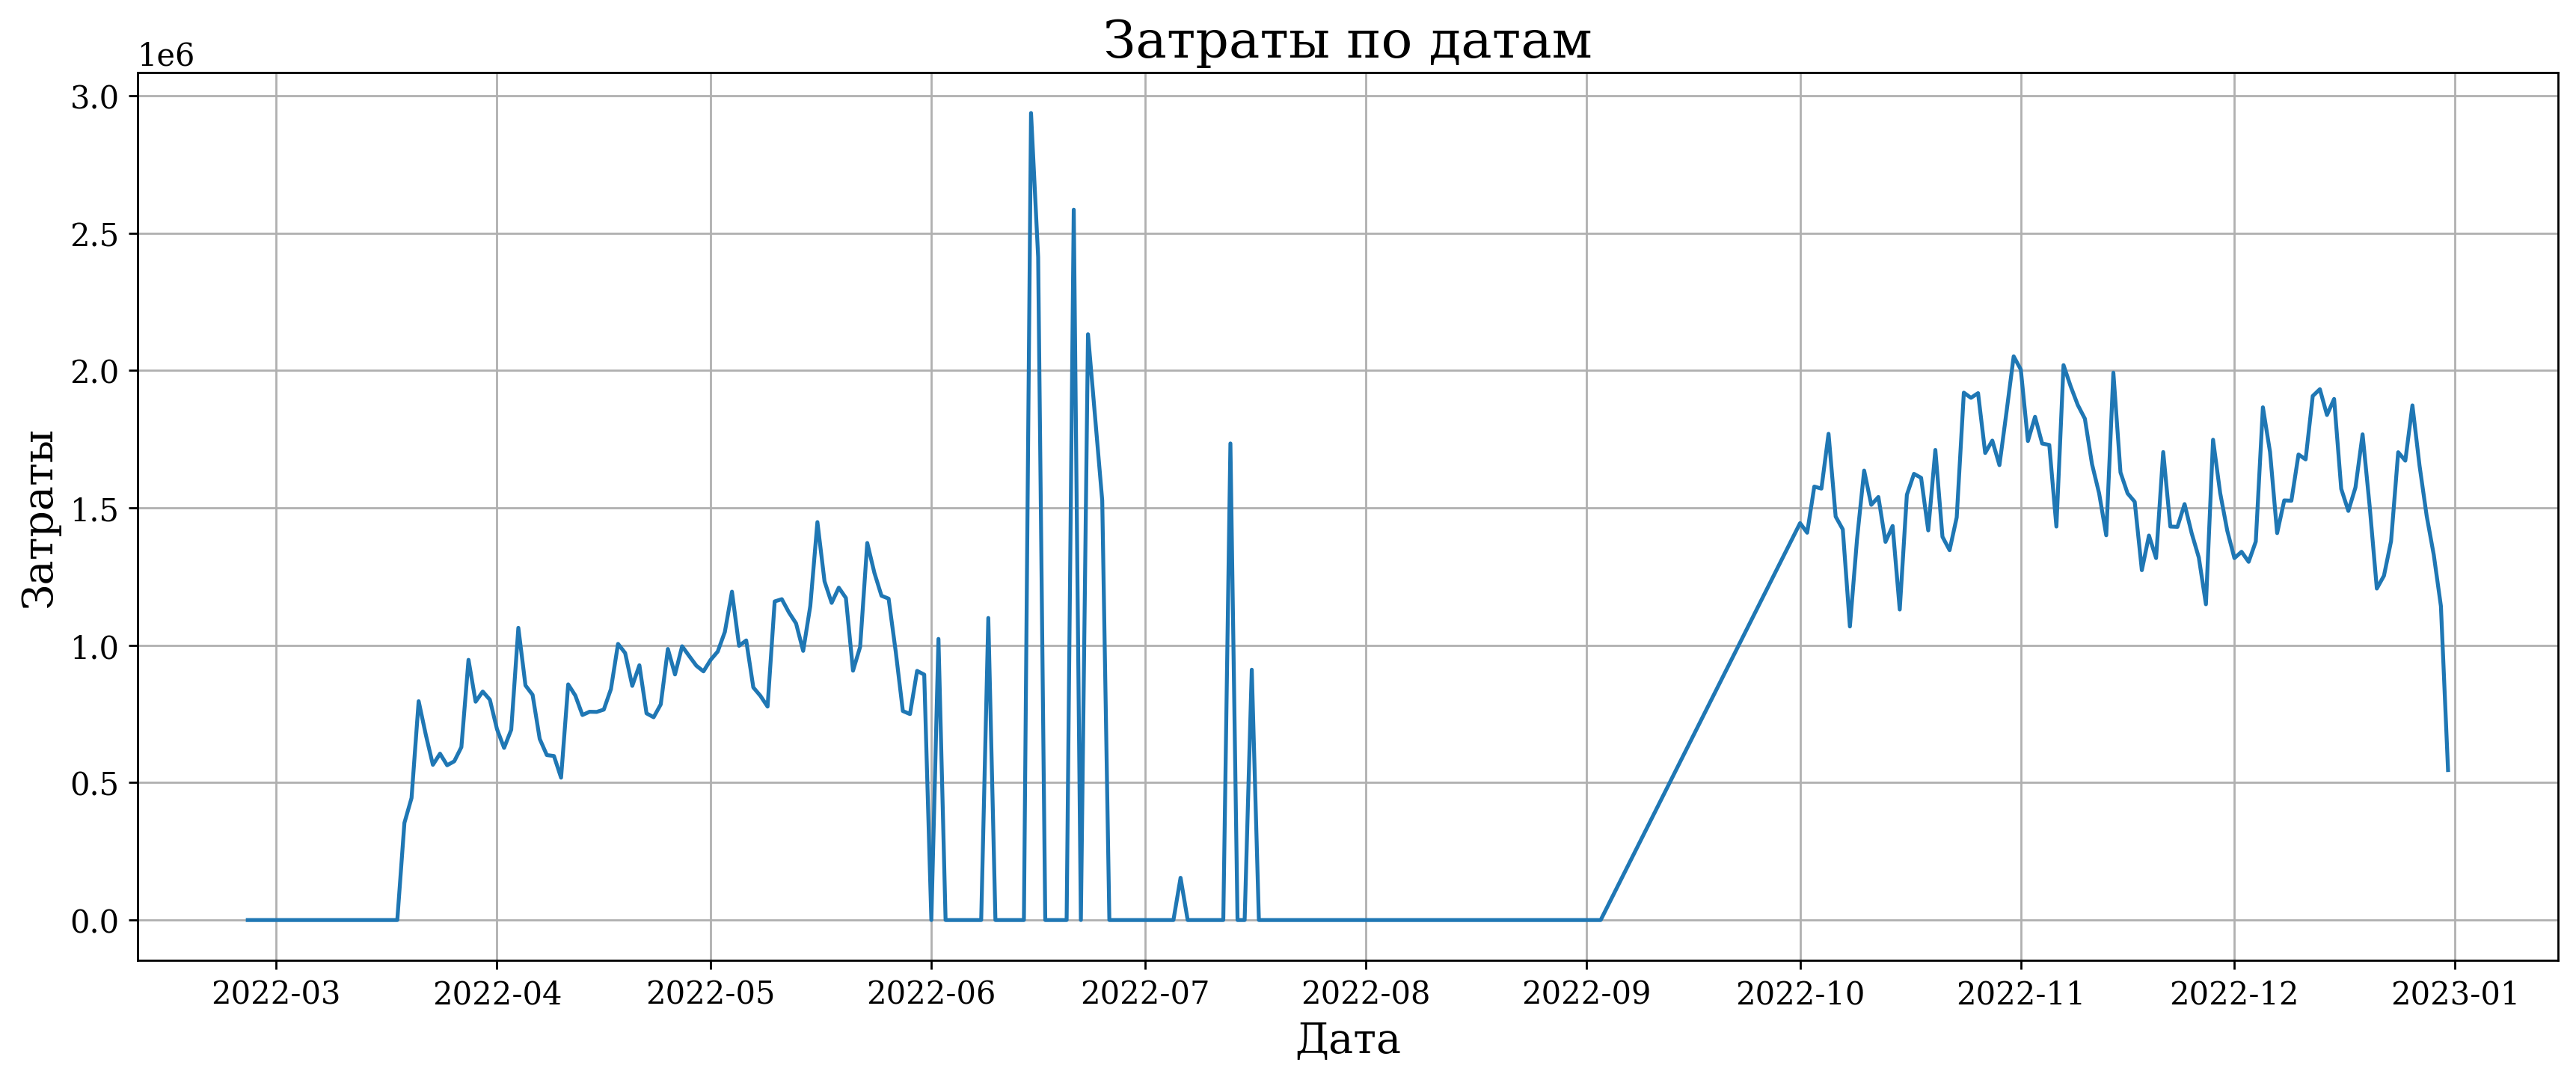

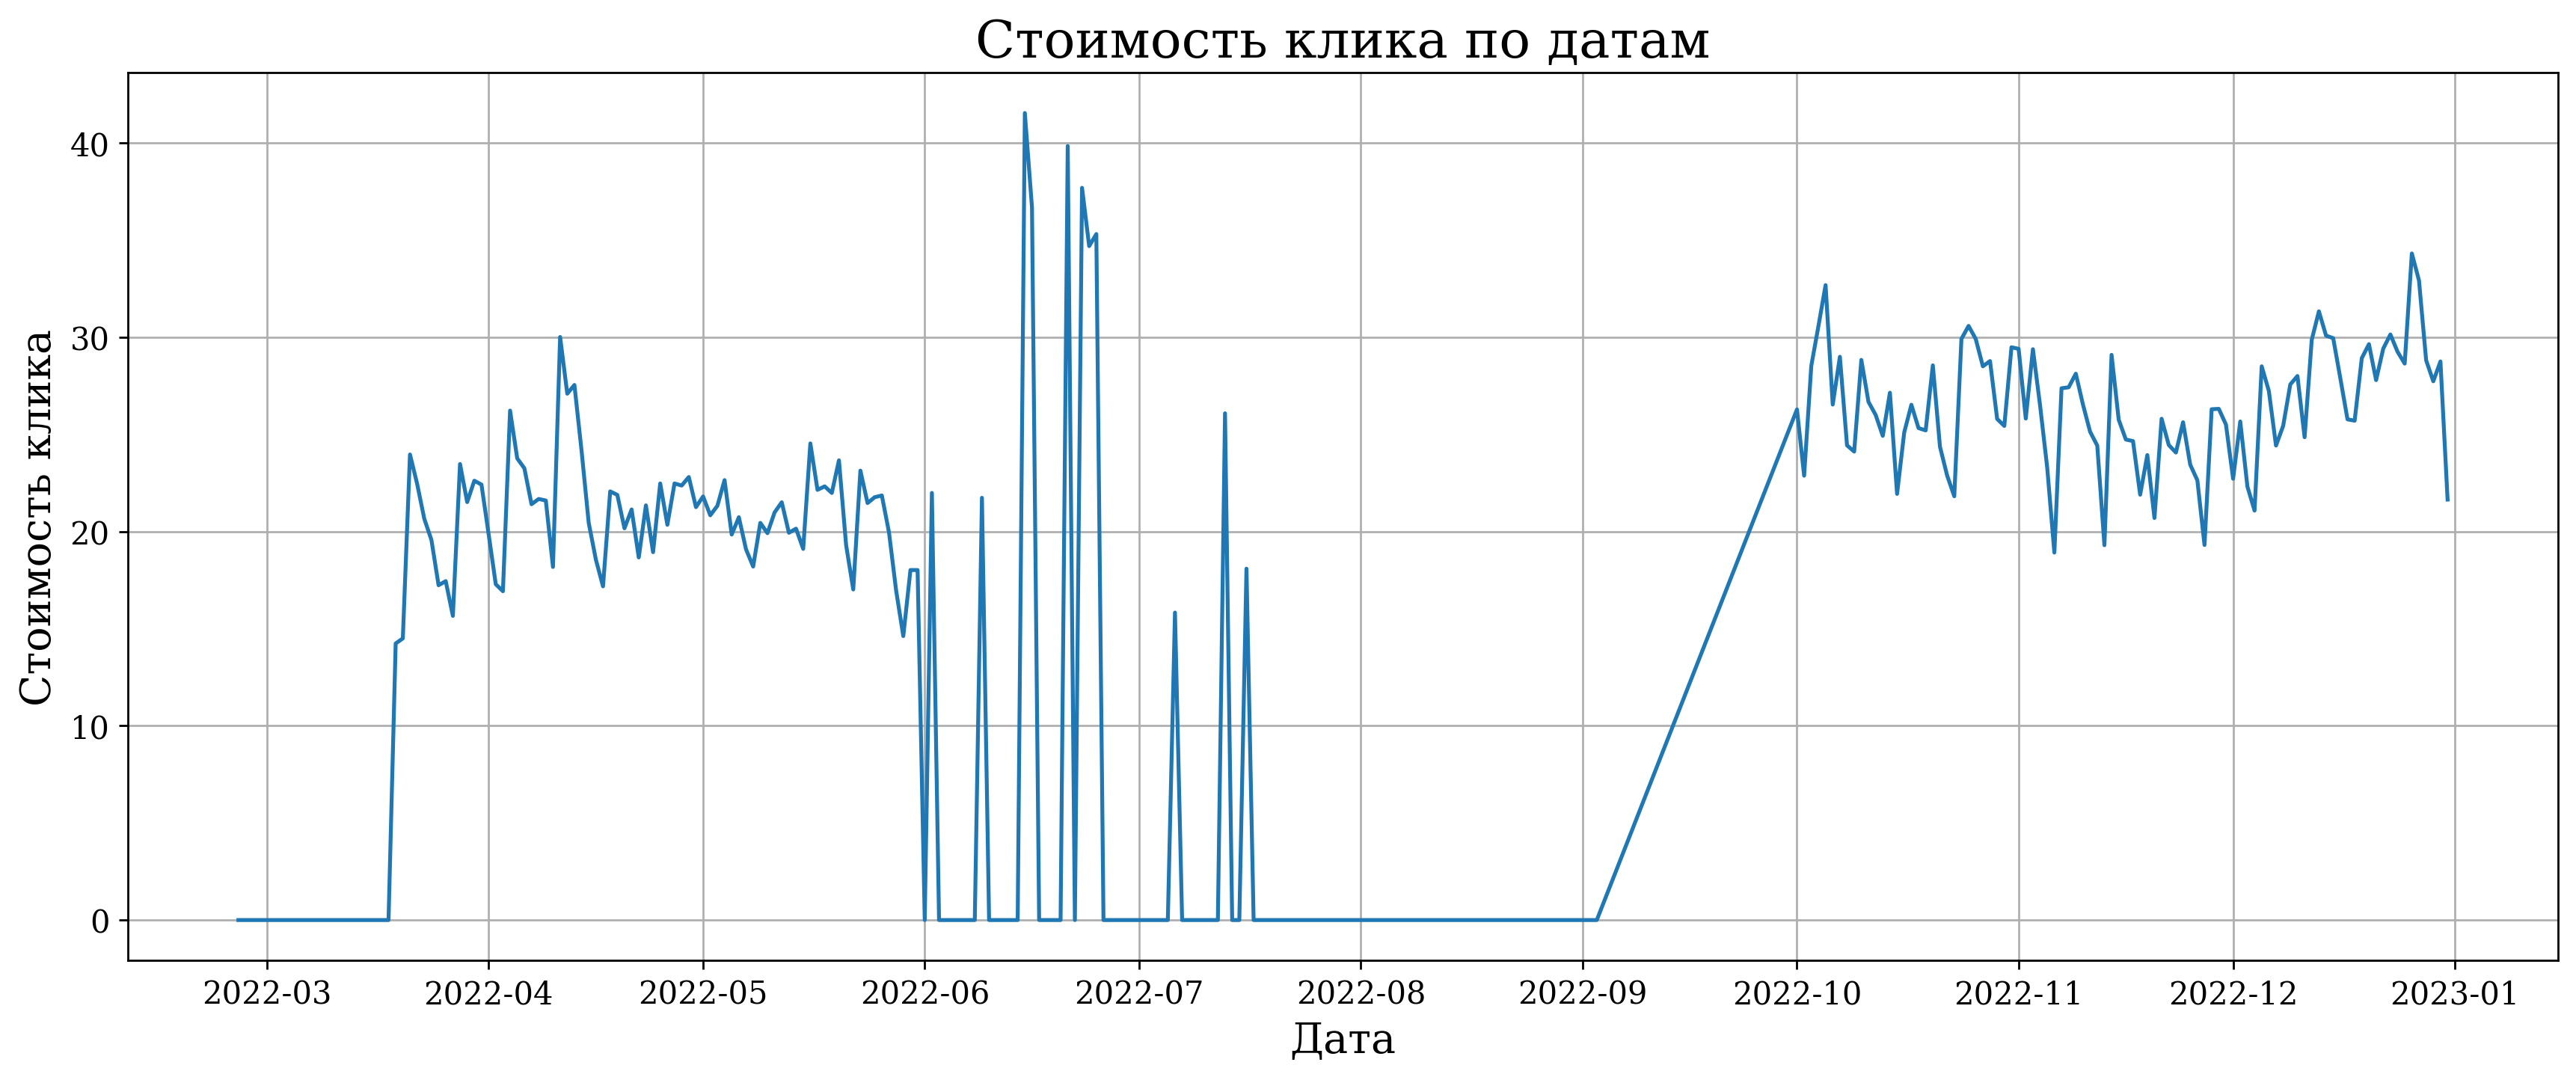

In [4]:
import matplotlib.pyplot as plt

# Расчет основных метрик
metrics = {
    'Общее количество показов': data_cleaned['Показы'].sum(),
    'Общее количество кликов': data_cleaned['Клики'].sum(),
    'Средний CTR (%)': (data_cleaned['Клики'].sum() / data_cleaned['Показы'].sum()) * 100,
    'Средняя цена клика': data_cleaned['Цена клика'].mean(),
    'Общие затраты': data_cleaned['Затраты'].sum(),
    'Средний процент отказов': data_cleaned['Отказы, %'].mean()
}

# Вывод метрик
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Визуализация данных
# График распределения CTR по датам
plt.figure(figsize=(14, 6), dpi=250)
plt.rc('font', family='serif')
plt.rc('font', size=14) 
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=12)  
plt.plot(pd.to_datetime(data_cleaned['Дата сеанса']), data_cleaned['Затраты'])
plt.title('Затраты по датам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.grid()
plt.tight_layout()
plt.show()

# График распределения стоимости клика по датам
plt.figure(figsize=(14, 6), dpi=250)
plt.rc('font', family='serif')
plt.rc('font', size=14) 
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=12)  
plt.plot(pd.to_datetime(data_cleaned['Дата сеанса']), data_cleaned['Цена клика'])
plt.title('Стоимость клика по датам')
plt.xlabel('Дата')
plt.ylabel('Стоимость клика')
plt.grid()
plt.tight_layout()
plt.show()

## 5. Анализ данных и расчет метрик относительно разных инсайтов

In [5]:
# Анализ структуры данных для выделения инсайтов и метрик
# Извлечение названий столбцов для идентификации инсайтов и метрик
columns = data_cleaned.columns
firms_and_metrics = {}

for col in columns:
    # Разделение столбцов по разделителю для идентификации возможных названий инсайтов
    parts = col.split(" - ")
    if len(parts) > 1 and parts[0] not in ['Выручка', 'Прибыль', 'Кол-во', 'ROI', 'ROAS', 'ДРР']:
        firm = parts[0]
        metric = " - ".join(parts[1:])
        if firm not in firms_and_metrics:
            firms_and_metrics[firm] = [metric]
        else:
            if metric not in firms_and_metrics[firm]:
                firms_and_metrics[firm].append(metric)

# Расчет основных метрик для каждого инсайта
for firm, metrics in firms_and_metrics.items():
    print(f"\nАнализ метрик для {firm}:")
    for metric in metrics:
        column_name = f"{firm} - {metric}"
        if column_name in data_cleaned.columns:
            # Суммарное значение для метрики
            total_metric_value = data_cleaned[column_name].sum()
            print(f"{metric}: {total_metric_value}")

# Подсчет и вывод общей чистой прибыли экономики интернет-магазина
losses_columns = [col for col in data_cleaned.columns if "Чистая прибыль" in col]
total_losses = data_cleaned[losses_columns].sum().mean()  # Среднее по всем столбцам Losses

# Вывод общих результатов
print(f"Общая чистая прибыль: {total_losses}")

# Вывод общих выводов на основе анализа
if total_losses < 0:
    print("Интернет-магазин испытывает значительные финансовые убытки. Необходима оптимизация расходов и пересмотр маркетинговой стратегии.")
    print("Рекомендации:")
    print("- Проведите аудит всех рекламных кампаний для определения их эффективности.")
    print("- Оптимизируйте рекламный бюджет, фокусируясь на каналах с наиболее высоким CR и наименьшим CPA.")
    print("- Анализируйте поведение пользователей на сайте для увеличения конверсии и среднего чека.")
else:
    print("Интернет-магазин демонстрирует положительную динамику финансовых результатов. Рекомендуется продолжить развитие успешных направлений.")


Анализ метрик для Чистая прибыль:
Clickhouse(c 22.05.23) - Без м.а. - CRM: -228126113
DataGo (c 16.01.23-5.08.23) - Без м.а. - CRM: -228126113
Продажи из Yandex Metrika - Посл. непр. вз. - Счетчик аналитики: -228126113
Электронная коммерция GA(до 28.06.23)+Метрика(с 29.06.23) - Составная цель - Cуммированные Цели: -228126116.95999998
OWOX(до 15.01.23)+DataGo(16.01.23-5.08.23) - Составная цель - Cуммированные Цели: -228126116.95999998
OWOX - Без м.а. - CRM: -228126113
Звонки через Calltouch - Без м.а. - Коллтрекинг Calltouch: -228126113
Продажи из Yandex Metrika - Посл. вз. - Счетчик аналитики: -228126113
Продажи из Yandex Metrika - Без м.а. - Счетчик аналитики: -228126113
Продажи из Google Analytics - Без м.а. - Счетчик аналитики: -228126113

Анализ метрик для ROI, %:
Clickhouse(c 22.05.23) - Без м.а. - CRM: -17700
DataGo (c 16.01.23-5.08.23) - Без м.а. - CRM: -17700
Продажи из Yandex Metrika - Посл. непр. вз. - Счетчик аналитики: -17700
Электронная коммерция GA(до 28.06.23)+Метрика(с

## 6. Визуализация результатов в классификации инсайтов

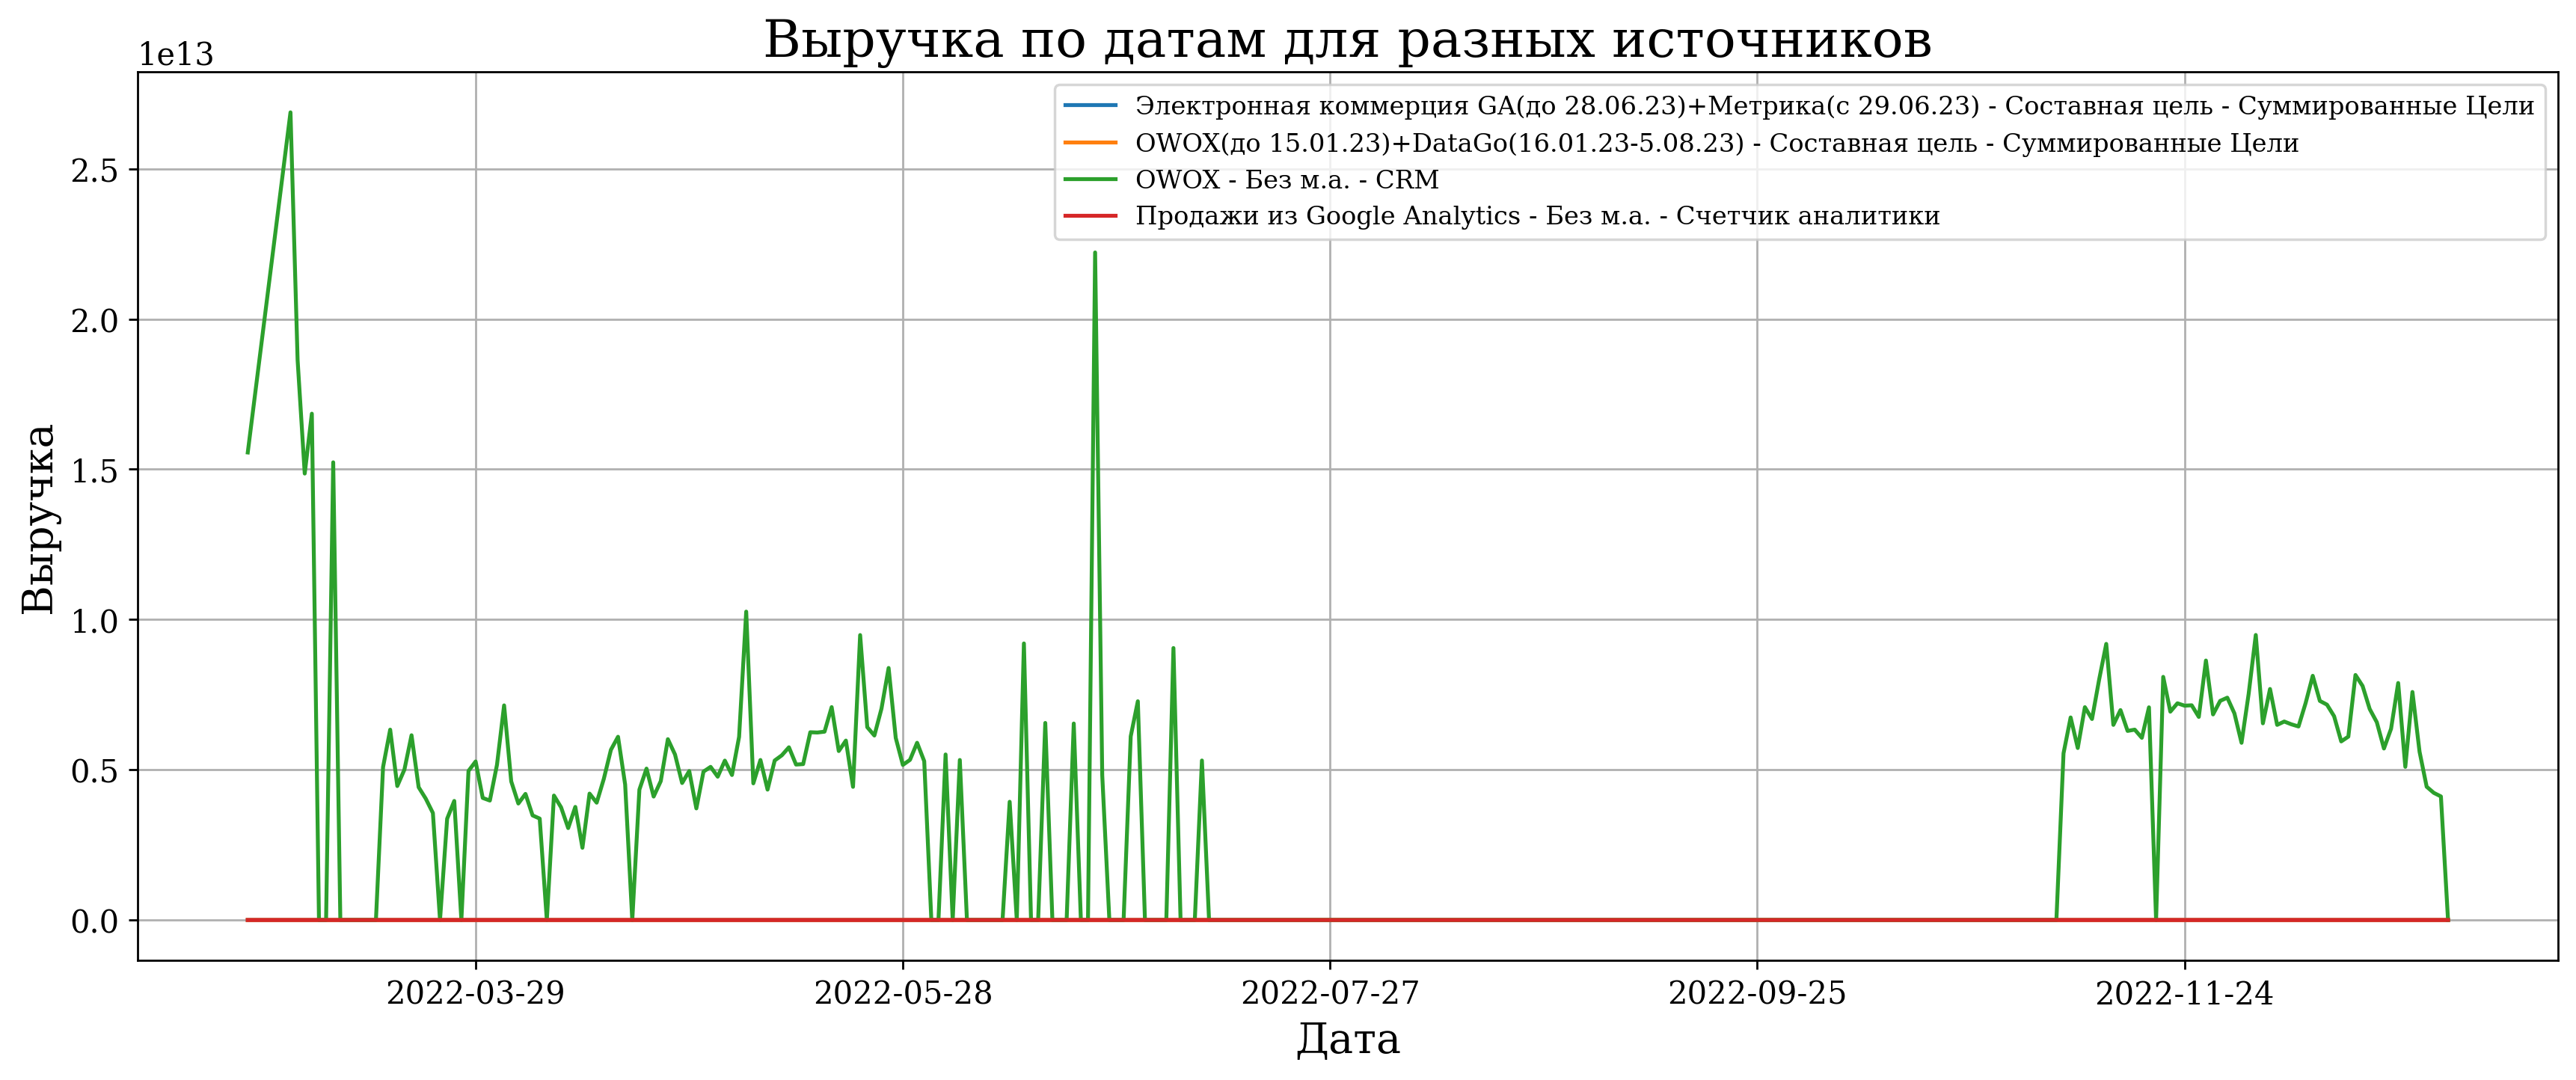

In [6]:
def plot_detailed_metric(data, base_metric):
    data['Дата сеанса'] = pd.to_datetime(data['Дата сеанса'])
    plt.figure(figsize=(14, 6), dpi=250)
    plt.rc('font', family='serif')
    plt.rc('font', size=14) 
    plt.rc('axes', titlesize=20) 
    plt.rc('axes', labelsize=16) 
    plt.rc('xtick', labelsize=12)  
    plt.rc('ytick', labelsize=12)  

    # Фильтруем столбцы, содержащие базовую метрику
    metric_columns = [col for col in data.columns if base_metric in col]

    for col in metric_columns:
        # Извлекаем детальное описание метрики для легенды
        detailed_metric_name = col.replace(base_metric + " - ", "")
        aggregated_data = data.groupby('Дата сеанса')[col].sum()
        
        # Отрисовываем график, если есть не нулевые данные
        if not aggregated_data.empty and aggregated_data.sum() != 0:
            plt.plot(aggregated_data.index, aggregated_data, label=detailed_metric_name)

    plt.title(f"{base_metric} по датам для разных источников")
    plt.xlabel("Дата")
    plt.ylabel(base_metric)

    # Управление легендой
    plt.legend(fontsize='x-small', loc='upper right')

    # Управление метками дат на оси X
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))  # Ограничиваем количество меток дат на оси X

    plt.grid()
    plt.tight_layout()
    plt.show()

# Вызов функции для отрисовки графика по метрике "Выручка"
plot_detailed_metric(data_cleaned, 'Выручка')